In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dus18 = pd.read_csv('NewData/DUS2018.csv')
dus18 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']]
dus18.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


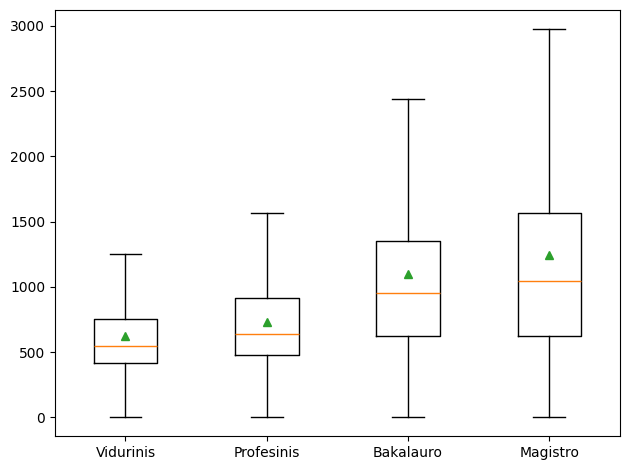

In [4]:
# boxplot()

atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atl = [atl_g1,atl_g2,atl_g3,atl_g4]
edus = ['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistro']
fig, axis = plt.subplots()
#plotting code:
axis.boxplot(atl, showmeans=True, showfliers=False)

axis.set_xticklabels(edus)

# axis.grid() # uzdeda grida
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

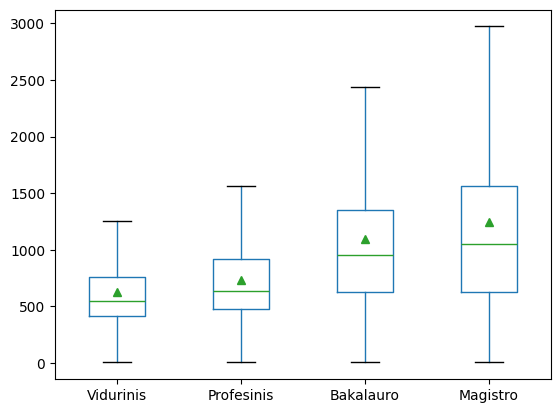

In [5]:
# II boxplot():
axis = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False)
axis.grid(visible=False) # isjungia grid'a
axis.set_xticklabels(edus)

plt.show()

[Text(1, 0, 'Vidurinis'),
 Text(2, 0, 'Profesinis'),
 Text(3, 0, 'Bakalauro'),
 Text(4, 0, 'Magistro')]

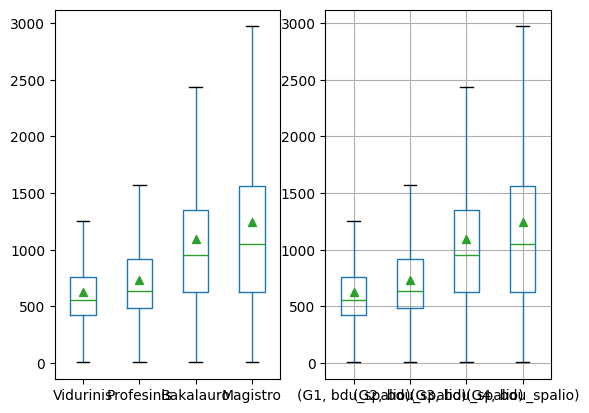

In [6]:
# II boxplot():

fig, (left, right) = plt.subplots(1,2)

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=left)
dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=right)
left.grid(visible=False)
left.set_xticklabels(edus)


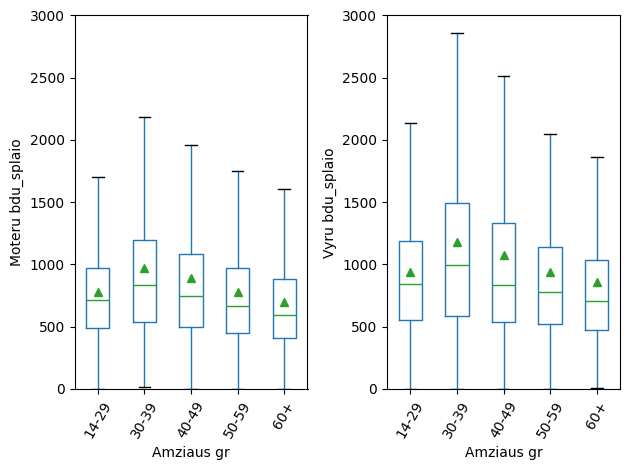

In [7]:
# # sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes. su subplots() 
# sukurkite 2 grafikus, kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. Prisiminkite ir sudėkite ašių pavadinimus

# dus18_M = dus18.query('lytis == "M"')['bdu_spalio'].values
# dus18_F = dus18.query('lytis == "F"')['bdu_spalio'].values

am = ['14-29','30-39','40-49','50-59','60+']

fig, (left, right) = plt.subplots(1,2)
dus18.query('lytis == "F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=left )
dus18.query('lytis == "M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=right )
left.grid(visible=False)
left.set_xticklabels(am)
left.set_xticklabels(am,rotation=60)
left.set_ylim(0,3000)
left.set_ylabel('Moteru bdu_splaio')
left.set_xlabel('Amziaus gr')

right.grid(visible=False)
right.set_xticklabels(am)
right.set_ylim(0,3000)
right.set_xticklabels(am,rotation=60)
right.set_ylabel('Vyru bdu_splaio')
right.set_xlabel('Amziaus gr')

fig.tight_layout() 